In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False
%matplotlib notebook
%matplotlib inline



In [2]:
##*ARQUIVO* - Layout caged movimentação
    ##Organizar os sheets do Layout CAGED
        # 'extrai' aba gênero
dfLayoutGenero = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='sexo')
        # 'extrai' Setor
dfLayoutSetor = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='cbo2002ocupação')
        # 'extrai' Nivel de escolaridade
dfLayoutEscolaridade = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='graudeinstrução')
        # 'extrai' Raça
dfLayoutRaca = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='raçacor')
        # extrai a planilha 'Layout'
dfLayout = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='Layout')

In [3]:
#Verificar o dataframe do Layout CAGED
dfLayout

,Layout dos Microdados Não Identificados do Novo CAGED - Base de Movimentações,Unnamed: 1,Unnamed: 2
0,Variável,Descrição,Código
1,competência,Competência da movimentação,<AAAAMM>
2,região,Região geográfica de acordo com o código do IBGE,<99>
3,uf,Unidade da federação de acordo com o código do...,<99>
4,município,Código do Município,<999999>
5,seção,Código da seção da classificação nacional de a...,<N>
6,subclasse,Código da subclasse da classificação nacional ...,<9999999>
7,saldomovimentação,Valor da movimentação em termos de saldo,<99>
8,cbo2002ocupação,Código da ocupação do trabalhador de acordo co...,<999999>
9,categoria,Categoria de trabalhador,<999>


In [4]:
dfLayoutGenero

,Código,Descrição
0,1,Homem
1,3,Mulher
2,9,Não Identificado


In [5]:
dfLayoutSetor

,Código,Descrição
0,10105,Oficial General da Aeronautica
1,10110,Oficial General do Exercito
2,10115,Oficial General da Marinha
3,10205,Oficial da Aeronautica
4,10210,Oficial do Exercito
...,...,...
2713,992210,Encarregado de Equipe de Conservacao de Vias P...
2714,992215,Operador de Ceifadeira na Conservacao de Vias ...
2715,992220,Pedreiro de Conservacao de Vias Permanentes (E...
2716,992225,Auxiliar Geral de Conservacao de Vias Permanen...


In [6]:
dfLayoutEscolaridade

,Código,Descrição
0,1,Analfabeto
1,2,Até 5ª Incompleto
2,3,5ª Completo Fundamental
3,4,6ª a 9ª Fundamental
4,5,Fundamental Completo
5,6,Médio Incompleto
6,7,Médio Completo
7,8,Superior Incompleto
8,9,Superior Completo
9,10,Mestrado


In [7]:
dfLayoutRaca

,Código,Descrição
0,1,Branca
1,2,Preta
2,3,Parda
3,4,Amarela
4,5,Indígena
5,6,Não informada
6,9,Não Identificado


In [8]:
colunas = ['graudeinstrução', 'idade', 'sexo','tipomovimentação','salário','raçacor']
##*ARQUIVO DE DADOS DE MOVIMENTAÇÃO 2020* 
movimento2020 = {
    'janeiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202001.txt', delimiter=';', usecols=colunas),
    'fevereiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202002.txt', delimiter=';', usecols=colunas),
    'marco':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202003.txt', delimiter=';', usecols=colunas),
    'abril':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202004.txt', delimiter=';', usecols=colunas),
    'maio':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202005.txt', delimiter=';', usecols=colunas),
    'junho':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202006.txt', delimiter=';', usecols=colunas),
    'julho':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202007.txt', delimiter=';', usecols=colunas),
    'agosto':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202008.txt', delimiter=';', usecols=colunas),
    'setembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202009.txt', delimiter=';', usecols=colunas),
    'outubro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202010.txt', delimiter=';', usecols=colunas),
    'novembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202011.txt', delimiter=';', usecols=colunas),
    'dezembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202012.txt', delimiter=';', usecols=colunas)
}

##*ARQUIVO DE DADOS DE MOVIMENTAÇÃO 2021* 
movimento2021 = {
    'janeiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202101.txt', delimiter=';', usecols=colunas),
    'fevereiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202102.txt', delimiter=';', usecols=colunas),
    'marco':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202103.txt', delimiter=';', usecols=colunas),
    'abril': pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202104.txt', delimiter=';', usecols=colunas)
}


In [9]:
#Função para saber se a pessoa foi demitida ou contratada
def movimento(cod):
    if cod in [10,20,25,35,70]:
        return 'admitido'
    elif cod in [31,32,33,40,43,45,50,60,80,90,98]:
        return 'demitido'
    else: 
        return False

In [10]:
#Classes sociais de acordo com o IBGE
#https://www.todamateria.com.br/classe-social/
def classes_sociais(salario):
    salario_minimo = 1100
    if(salario>(salario_minimo*20)):
        return 'A'
    elif((salario>(salario_minimo*10))and(salario<=(salario_minimo*20))):
        return 'B'
    elif((salario>(salario_minimo*4))and(salario<=(salario_minimo*10))):
        return 'C'
    elif((salario>(salario_minimo*2))and(salario<=(salario_minimo*4))):
        return 'D'
    elif(salario<=(salario_minimo*2)):
        return 'E'

In [11]:
#Numeração da raça de acordo com o novo Layout dos Microdados do CAGED
def Raca(numRaca):
    if(numRaca == 1):
        return 'Branca'
    elif(numRaca == 2):
        return 'Preta'
    elif(numRaca == 3):
        return 'Parda'
    elif(numRaca == 4):
        return 'Amarela'
    elif(numRaca == 5):
        return 'Indígena'
    elif(numRaca == 6):
        return 'Não informada'
    elif(numRaca == 9):
        return 'Não identificada'
    

In [12]:
def contagemEmpregoSexo(dic):
    mes = {'mulheres':{'admissoes':0,'demissoes':0,'nao_identificado':0},'homens':{'admissoes':0,'demissoes':0,'nao_identificado':0}}
    for k,v in dic.items():
        if(movimento(k[0])=='admitido'):
            if(k[1]==1):
                mes['homens']['admissoes']+=v 
            if(k[1]==3):
                mes['mulheres']['admissoes']+=v
        elif(movimento(k[0])=='demitido'):
            if(k[1]==1):
                mes['homens']['demissoes']+=v
            if(k[1]==3):
                mes['mulheres']['demissoes']+=v
        else:
            if(k[1]==1):
                mes['homens']['nao_identificado']+=v
            if(k[1]==3):
                mes['mulheres']['nao_identificado']+=v
    return mes
def contagemEmpregoClasseSocial(lista): 
    demitidos = {'A':0,'B':0,'C':0,'D':0,'E':0}
    admitidos = {'A':0,'B':0,'C':0,'D':0,'E':0}
    nao_identificado = {'A':0,'B':0,'C':0,'D':0,'E':0}
    for l in lista:
        if movimento(l['tipomovimentação'])=='admitido':
            if(classes_sociais(l['salário'])=='A'):
                admitidos['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                admitidos['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                admitidos['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                admitidos['D']+=1
            else:
                admitidos['E']+=1
        elif movimento(l['tipomovimentação'])=='demitido':
            if(classes_sociais(l['salário'])=='A'):
                demitidos['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                demitidos['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                demitidos['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                demitidos['D']+=1
            else:
                demitidos['E']+=1
        else:
            if(classes_sociais(l['salário'])=='A'):
                nao_identificado['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                nao_identificado['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                nao_identificado['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                nao_identificado['D']+=1
            else:
                nao_identificado['E']+=1
        
    return {
        'admitidos':admitidos,
        'demitidos':demitidos,
        'nao_identificado':nao_identificado
    }

In [13]:
#função para renderizar o gráfico de emprego de acordo com gênero
def plotGraficoEmpregoGenero(mulheres,homens,label_homens,label_mulheres,xlabel,ylabel,title,tamanhox,tamanhoy,meses):
    barWidth = 0.25
    plt.figure(figsize=(tamanhox,tamanhoy))
    r1 = np.arange(len(mulheres))
    r2 = [x + barWidth for x in r1]
    plt.bar(r1,mulheres,color='#6A5ACD',width=barWidth,label=label_mulheres)
    plt.bar(r2,homens,color='#649AED',width=barWidth,label=label_homens)
    plt.xlabel(xlabel)
    plt.xticks([r + barWidth for r in range(len(mulheres))],meses)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [14]:
##Verificar o dataframe do CAGED Movimentação 

#Admissões e demissões por gênero 2020
empregoPorGenero2020 = {}
for mes in movimento2020:
    empregoPorGenero2020[mes]=contagemEmpregoSexo(movimento2020[mes].sample(50).groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())
#Admissões e demissões por gênero 2021 
empregoPorGenero2021 = {}
for mes in movimento2021:
    empregoPorGenero2021[mes]=contagemEmpregoSexo(movimento2021[mes].sample(50).groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())


In [15]:
#função para renderizar o gráfico de emprego de acordo com a classe social
def plotGraficoEmpregoClasseSocial(lista_A,lista_B,lista_C,lista_D,lista_E,ylabel,xlabel,title,tamanhox,tamanhoy,meses):

    fig, ax = plt.subplots()

    ax.plot(meses, lista_A, lw = 2, alpha = 1,label='A')
    ax.plot(meses, lista_B, lw = 2, alpha = 1,label='B')
    ax.plot(meses, lista_C, lw = 2, alpha = 1,label='C')
    ax.plot(meses, lista_D, lw = 2, alpha = 1,label='D')
    ax.plot(meses, lista_E, lw = 2, alpha = 1,label='E')
    fig.set_size_inches(tamanhox, tamanhoy)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

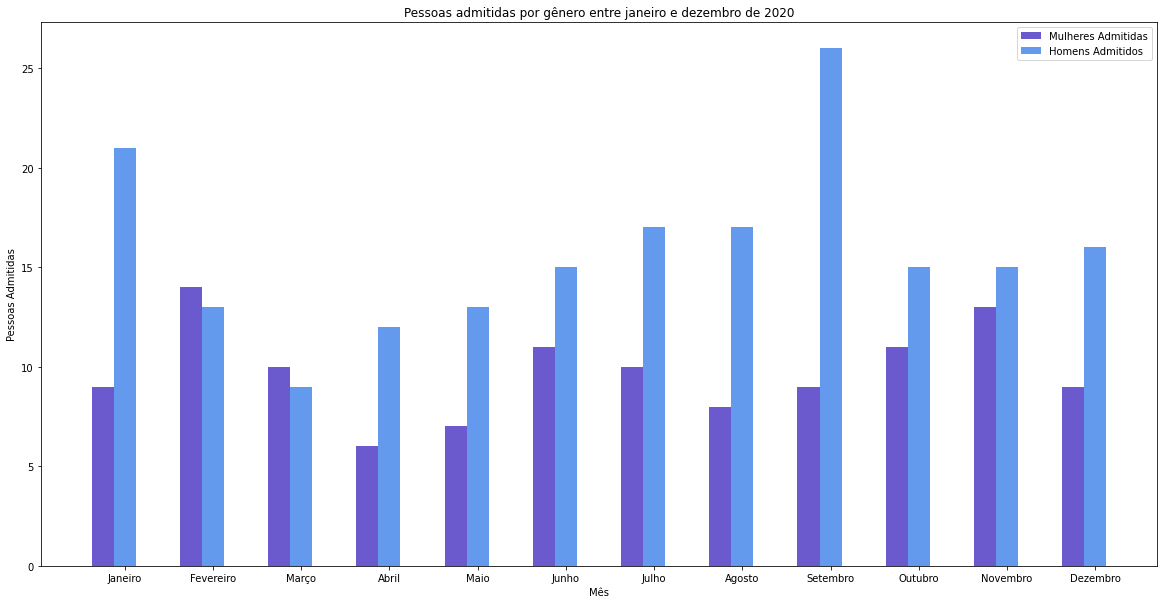

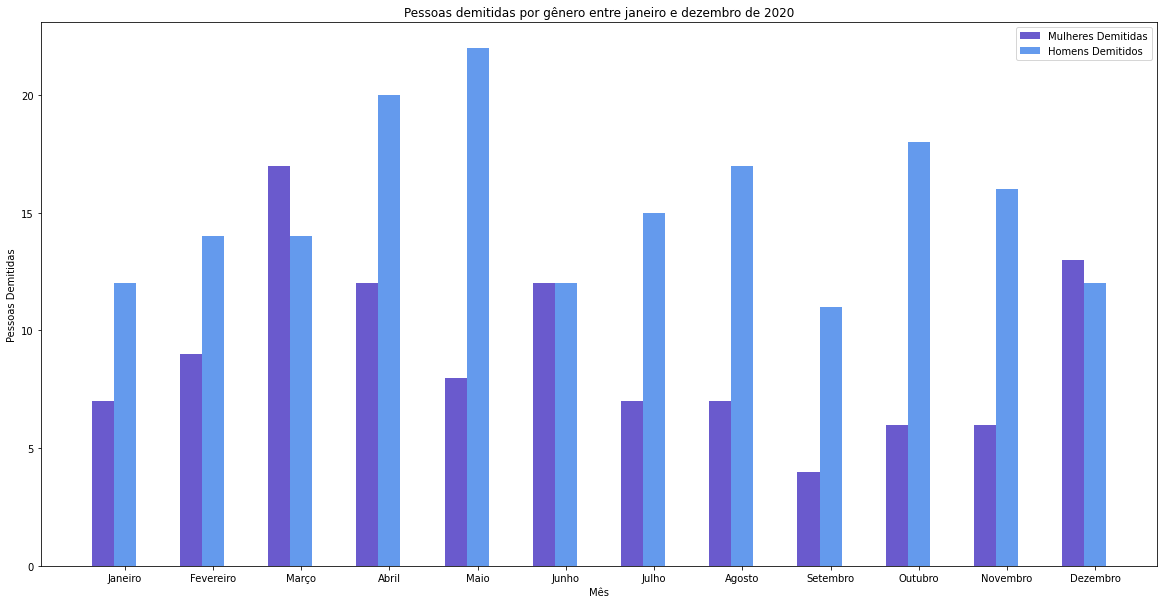

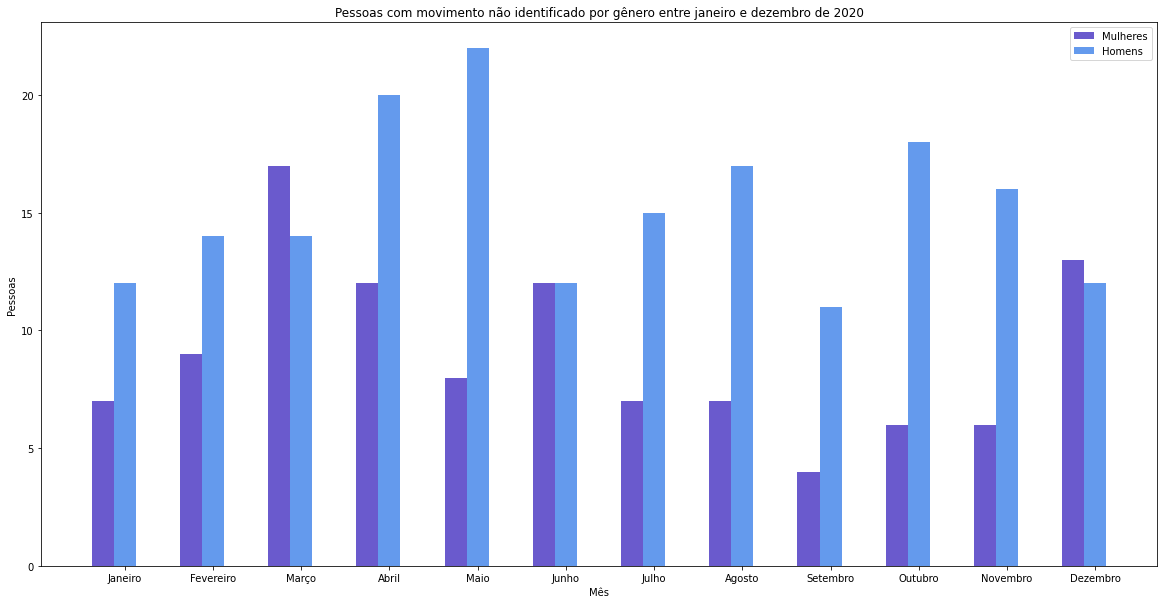

In [16]:
#Gŕaficos de Admissões e demissões por gênero 2020 
meses_grafico2020 = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
mulheres_admitidos2020 = []
mulheres_demitidos2020 = []
homens_admitidos2020 = []
homens_demitidos2020 = []
mulheres_nao_identificado2020 = []
homens_nao_identificado2020 = []

for mes,dic in empregoPorGenero2020.items():
    mulheres_admitidos2020.append(dic['mulheres']['admissoes'])
    homens_admitidos2020.append(dic['homens']['admissoes'])
    mulheres_demitidos2020.append(dic['mulheres']['demissoes'])
    homens_demitidos2020.append(dic['homens']['demissoes'])
    mulheres_nao_identificado2020.append(dic['mulheres']['nao_identificado'])
    homens_nao_identificado2020.append(dic['homens']['nao_identificado'])
plotGraficoEmpregoGenero(mulheres_admitidos2020,homens_admitidos2020,'Homens Admitidos','Mulheres Admitidas','Mês','Pessoas Admitidas','Pessoas admitidas por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
plotGraficoEmpregoGenero(mulheres_demitidos2020,homens_demitidos2020,'Homens Demitidos','Mulheres Demitidas','Mês','Pessoas Demitidas','Pessoas demitidas por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
plotGraficoEmpregoGenero(mulheres_demitidos2020,homens_demitidos2020,'Homens','Mulheres','Mês','Pessoas','Pessoas com movimento não identificado por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)



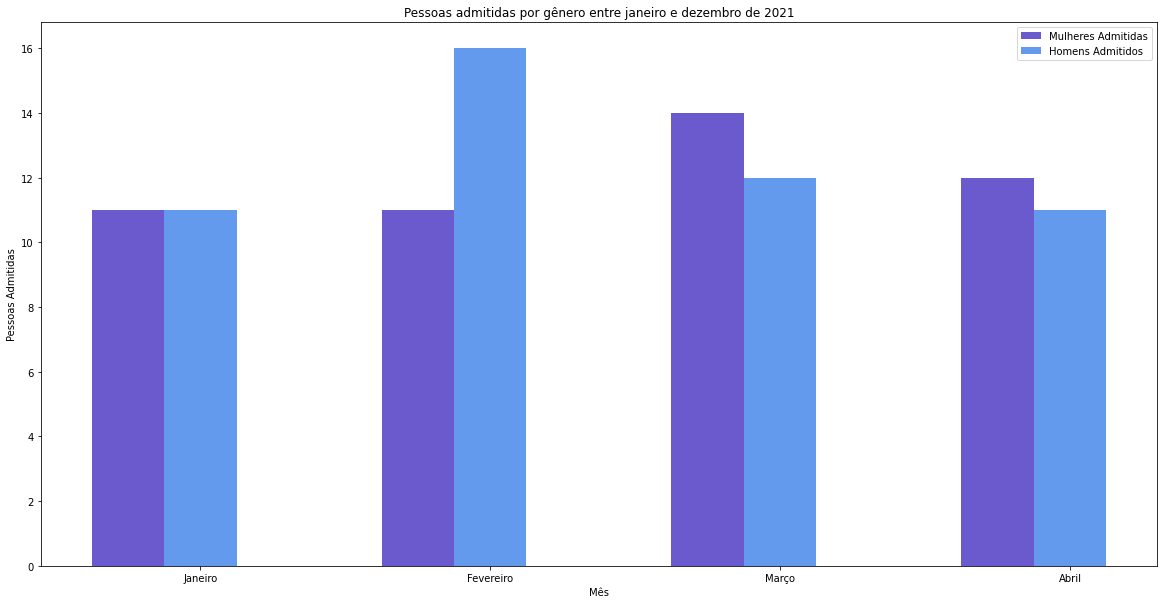

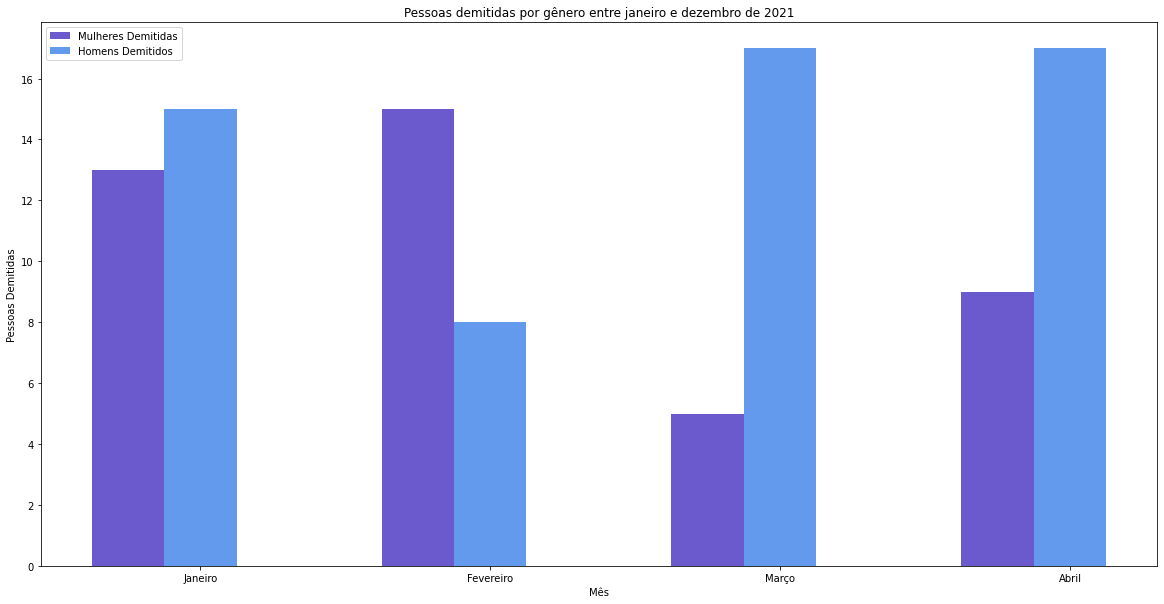

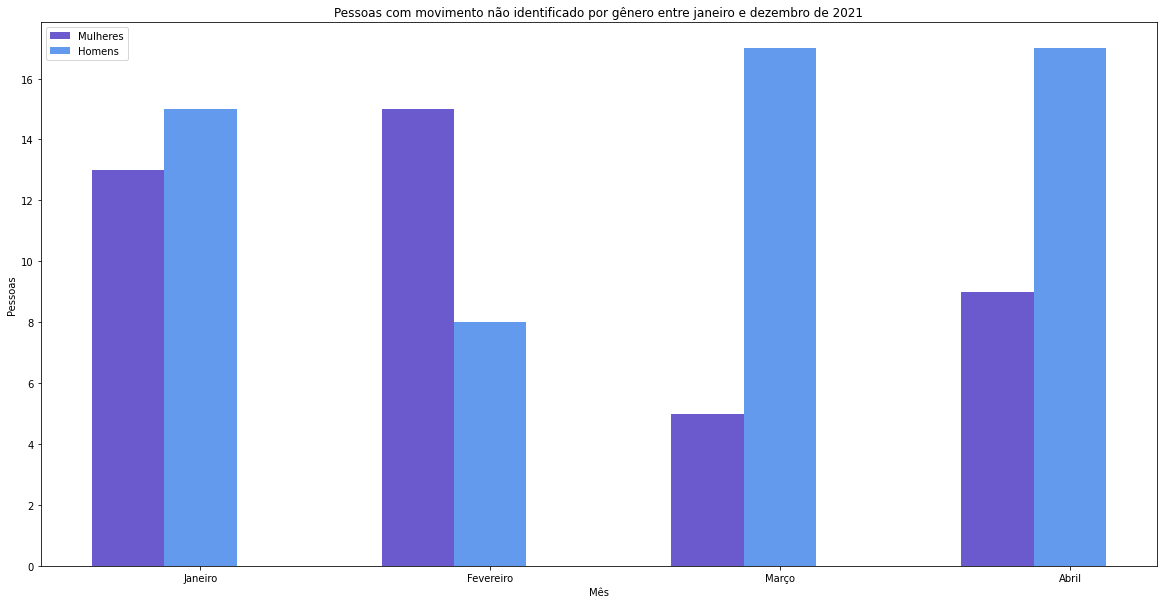

In [17]:
#Gŕaficos de Admissões e demissões por gênero 2021
meses_grafico2021 = ['Janeiro','Fevereiro','Março','Abril']
mulheres_admitidos2021 = []
mulheres_demitidos2021 = []
homens_admitidos2021 = []
homens_demitidos2021 = []
mulheres_nao_identificado2021 = []
homens_nao_identificado2021 = []

for mes,dic in empregoPorGenero2021.items():
    mulheres_admitidos2021.append(dic['mulheres']['admissoes'])
    homens_admitidos2021.append(dic['homens']['admissoes'])
    mulheres_demitidos2021.append(dic['mulheres']['demissoes'])
    homens_demitidos2021.append(dic['homens']['demissoes'])
    mulheres_nao_identificado2021.append(dic['mulheres']['nao_identificado'])
    homens_nao_identificado2021.append(dic['homens']['nao_identificado'])
plotGraficoEmpregoGenero(mulheres_admitidos2021,homens_admitidos2021,'Homens Admitidos','Mulheres Admitidas','Mês','Pessoas Admitidas','Pessoas admitidas por gênero entre janeiro e dezembro de 2021',20,10,meses_grafico2021)
plotGraficoEmpregoGenero(mulheres_demitidos2021,homens_demitidos2021,'Homens Demitidos','Mulheres Demitidas','Mês','Pessoas Demitidas','Pessoas demitidas por gênero entre janeiro e dezembro de 2021',20,10,meses_grafico2021)
plotGraficoEmpregoGenero(mulheres_demitidos2021,homens_demitidos2021,'Homens','Mulheres','Mês','Pessoas','Pessoas com movimento não identificado por gênero entre janeiro e dezembro de 2021',20,10,meses_grafico2021)


In [18]:
#Admissões e demissões por classe social 2020 
empregoPorClasseSocial2020 = {}
for mes in movimento2020:
    empregoPorClasseSocial2020[mes]=contagemEmpregoClasseSocial(movimento2020[mes][['tipomovimentação','salário']].sample(50).to_dict('records'))

#Admissões e demissões por classe social 2021
empregoPorClasseSocial2021 = {} 
for mes in movimento2021:
    empregoPorClasseSocial2021[mes]=contagemEmpregoClasseSocial(movimento2021[mes][['tipomovimentação','salário']].sample(50).to_dict('records'))

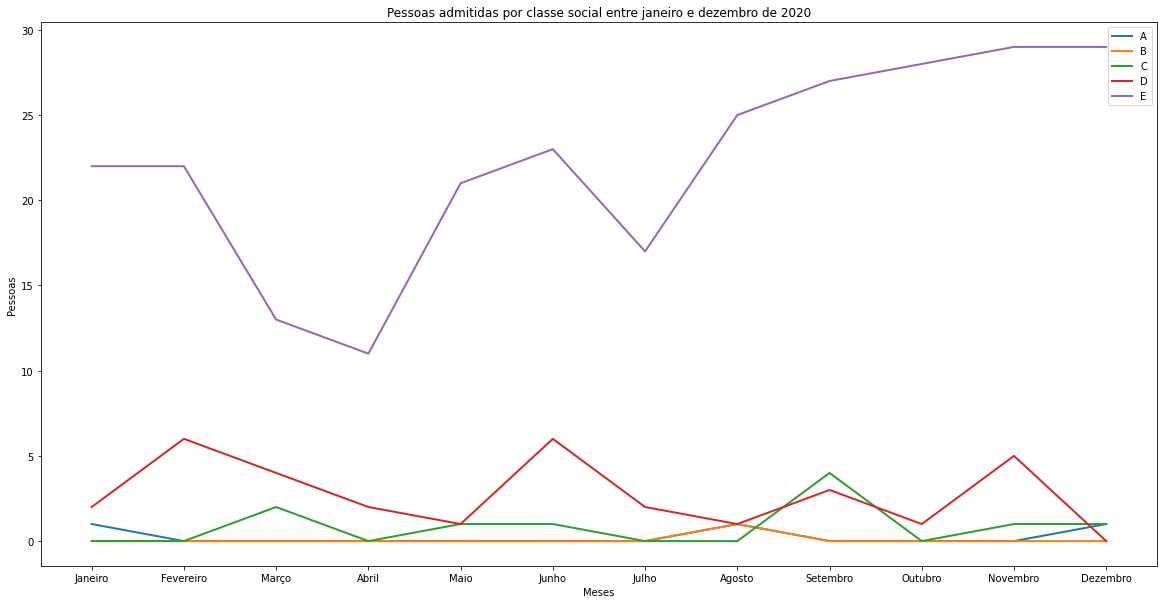

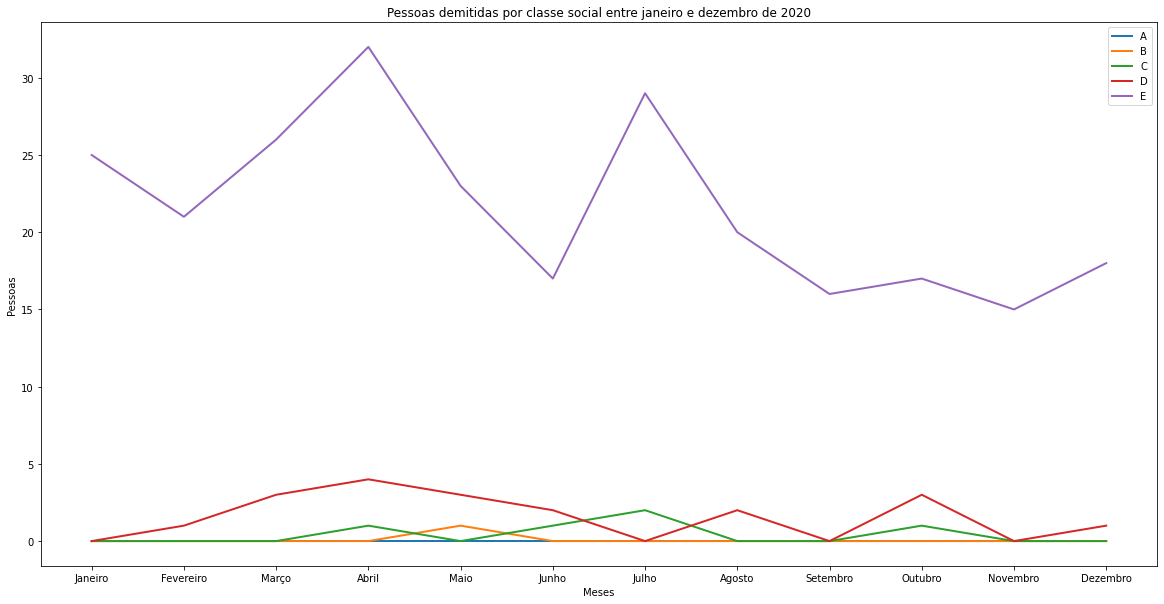

In [19]:
lista_A_admitidos2020 = []
lista_A_demitidos2020 = []
lista_B_admitidos2020 = []
lista_B_demitidos2020 = []
lista_C_admitidos2020 = []
lista_C_demitidos2020 = []
lista_D_admitidos2020 = []
lista_D_demitidos2020 = []
lista_E_admitidos2020 = []
lista_E_demitidos2020 = []
for mes,dic in empregoPorClasseSocial2020.items():
    lista_A_admitidos2020.append(dic['admitidos']['A'])
    lista_A_demitidos2020.append(dic['demitidos']['A'])
    lista_B_admitidos2020.append(dic['admitidos']['B'])
    lista_B_demitidos2020.append(dic['demitidos']['B'])
    lista_C_admitidos2020.append(dic['admitidos']['C'])
    lista_C_demitidos2020.append(dic['demitidos']['C'])
    lista_D_admitidos2020.append(dic['admitidos']['D'])
    lista_D_demitidos2020.append(dic['demitidos']['D'])
    lista_E_admitidos2020.append(dic['admitidos']['E'])
    lista_E_demitidos2020.append(dic['demitidos']['E'])

#gráfico das pessoas admitidas por classe social entre janeiro e dezembro de 2020
plotGraficoEmpregoClasseSocial(
    lista_A_admitidos2020,
    lista_B_admitidos2020,
    lista_C_admitidos2020,
    lista_D_admitidos2020,
    lista_E_admitidos2020,
    'Pessoas','Meses','Pessoas admitidas por classe social entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
#gráfico das pessoas demitidas por classe social entre janeiro e dezembro de 2020
plotGraficoEmpregoClasseSocial(
    lista_A_demitidos2020,
    lista_B_demitidos2020,
    lista_C_demitidos2020,
    lista_D_demitidos2020,
    lista_E_demitidos2020,
    'Pessoas','Meses','Pessoas demitidas por classe social entre janeiro e dezembro de 2020',20,10,meses_grafico2020)

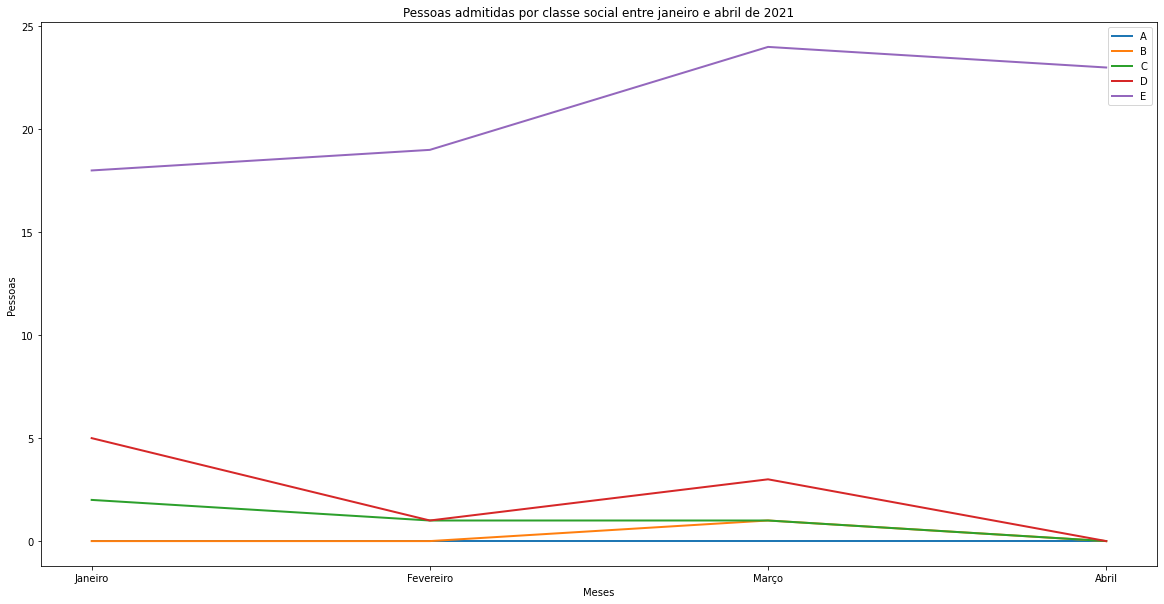

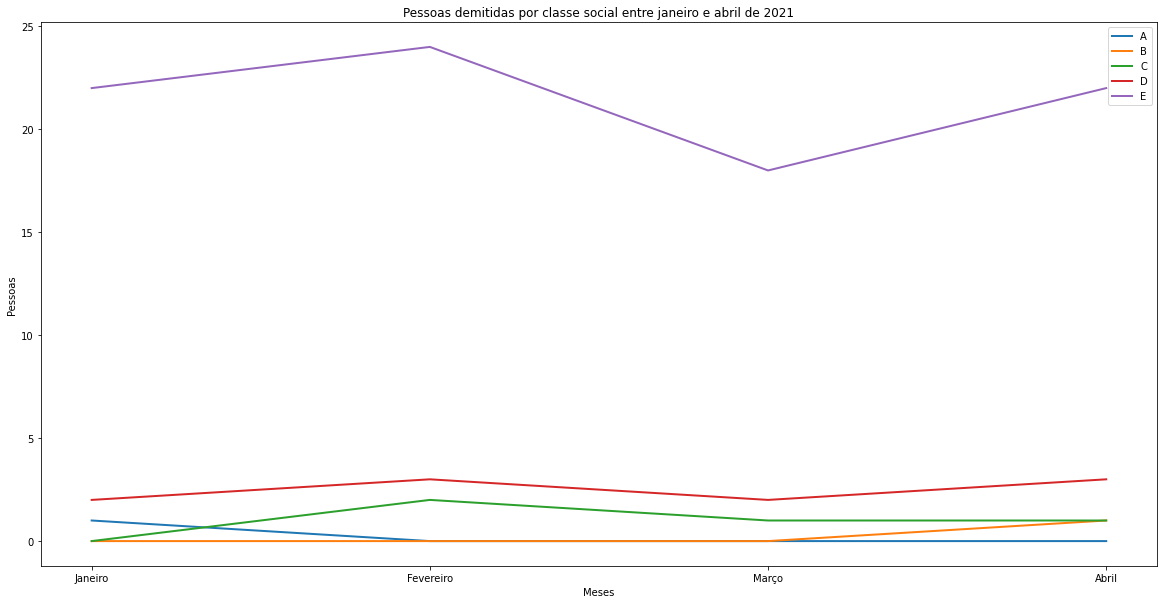

In [20]:
lista_A_admitidos2021 = []
lista_A_demitidos2021 = []
lista_B_admitidos2021 = []
lista_B_demitidos2021 = []
lista_C_admitidos2021 = []
lista_C_demitidos2021 = []
lista_D_admitidos2021 = []
lista_D_demitidos2021 = []
lista_E_admitidos2021 = []
lista_E_demitidos2021 = []
for mes,dic in empregoPorClasseSocial2021.items():
    lista_A_admitidos2021.append(dic['admitidos']['A'])
    lista_A_demitidos2021.append(dic['demitidos']['A'])
    lista_B_admitidos2021.append(dic['admitidos']['B'])
    lista_B_demitidos2021.append(dic['demitidos']['B'])
    lista_C_admitidos2021.append(dic['admitidos']['C'])
    lista_C_demitidos2021.append(dic['demitidos']['C'])
    lista_D_admitidos2021.append(dic['admitidos']['D'])
    lista_D_demitidos2021.append(dic['demitidos']['D'])
    lista_E_admitidos2021.append(dic['admitidos']['E'])
    lista_E_demitidos2021.append(dic['demitidos']['E'])
#gráfico das pessoas admitidas por classe social entre janeiro e abril de 2021
plotGraficoEmpregoClasseSocial(
    lista_A_admitidos2021,
    lista_B_admitidos2021,
    lista_C_admitidos2021,
    lista_D_admitidos2021,
    lista_E_admitidos2021,
    'Pessoas','Meses','Pessoas admitidas por classe social entre janeiro e abril de 2021',20,10,meses_grafico2021)
#gráfico das pessoas demitidas por classe social entre janeiro e abril de 2021
plotGraficoEmpregoClasseSocial(
    lista_A_demitidos2021,
    lista_B_demitidos2021,
    lista_C_demitidos2021,
    lista_D_demitidos2021,
    lista_E_demitidos2021,
    'Pessoas','Meses','Pessoas demitidas por classe social entre janeiro e abril de 2021',20,10,meses_grafico2021)

In [22]:
# pessoas admitidas/demitidas por faixa etária
# fonte para dividir a faixa etária: https://educador.brasilescola.uol.com.br/estrategias-ensino/faixa-etaria-populacao-brasileira.htm
## jovens: idade <= 19
## adultos: idade >= 20 e <= 59
## idosos: idade >= 60
jovensAdmitidos = 0
adultosAdmitidos = 0
idososAdmitidos = 0
jovensDemitidos = 0
adultosDemitidos = 0
idososDemitidos = 0
meses_grafico2020 = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
for mes in meses_grafico2020:
    for individuo in movimento2020[mes].sample(50).iterrows():
        idadeIndividuo = int(individuo[1]['idade'])
        if idadeIndividuo <= 19:
            if movimento(individuo[1]['tipomovimentação']) == 'admitido':
                jovensAdmitidos += 1
            elif movimento(individuo[1]['tipomovimentação']) == 'demitido':
                jovensDemitidos += 1
        elif idadeIndividuo >= 20 and idadeIndividuo <= 59:
            if movimento(individuo[1]['tipomovimentação']) == 'admitido':
                adultosAdmitidos += 1
            elif movimento(individuo[1]['tipomovimentação']) == 'demitido':
                adultosDemitidos += 1
        elif idadeIndividuo >= 60:
            if movimento(individuo[1]['tipomovimentação']) == 'admitido':
                idososAdmitidos += 1
            elif movimento(individuo[1]['tipomovimentação']) == 'demitido':
                idososDemitidos += 1
                
print('Jovens admitidos: ' + jovensAdmitidos);
print('Adultos admitidos: ' + adultosAdmitidos);
print('Idosos admitidos: ' + idososAdmitidos);
print('Jovens demitidos: ' + jovensDemitidos);
print('Adultos demitidos: ' + adultosDemitidos);
print('Idosos Demitidos: ' + idososDemitidos);

KeyError: 'Janeiro'

In [ ]:
#*Média salárial por raça*
Branca = {'salario':0 , 'quantidade':0, 'media':0}
Preta = {'salario':0 , 'quantidade':0, 'media':0}
Parda = {'salario':0 , 'quantidade':0, 'media':0}
Amarela = {'salario':0 , 'quantidade':0, 'media':0}
Indigena = {'salario':0 , 'quantidade':0, 'media':0}
Nao_informada = {'salario':0 , 'quantidade':0, 'media':0}
Nao_identificada = {'salario':0 , 'quantidade':0, 'media':0}
meses_grafico2020 = ['janeiro']#,'fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'
for mes in meses_grafico2020:
    for individuo in movimento2020[mes].sample(5000).iterrows():
        if Raca(int(individuo[1]['raçacor'])) == 'Branca':
            Branca["salario"] += individuo[1]['salário']
            Branca["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Preta':
            Preta["salario"] += individuo[1]['salário']
            Preta["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Parda':
            Parda["salario"] += individuo[1]['salário']
            Parda["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Amarela':
            Amarela["salario"] += individuo[1]['salário']
            Amarela["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Indígena':
            Indigena["salario"] += individuo[1]['salário']
            Indigena["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Não informada':
            Nao_informada["salario"] += individuo[1]['salário']
            Nao_informada["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Não identificada':
            Nao_identificada["salario"] += individuo[1]['salário']
            Nao_identificada["quantidade"] += 1
##Se por algum acaso der -Erro, divisão por 0-, tente rodar de novo para que tenha
Branca['media'] = Branca['salario']/Branca['quantidade']
Preta['media'] = Preta['salario']/Preta['quantidade']
Parda['media'] = Parda['salario']/Parda['quantidade']
Amarela['media'] = Amarela['salario']/Amarela['quantidade']
Indigena['media'] = Indigena['salario']/Indigena['quantidade']
Nao_informada['media'] = Nao_informada['salario']/Nao_informada['quantidade']
Nao_identificada['media'] = Branca['salario']/Nao_identificada['quantidade']
print(Branca)
print(Preta)
print(Parda)
print(Amarela)
print(Indigena)
print(Nao_informada)
print(Nao_identificada)

In [ ]:

def contagemEmpregoPorInstrucao(dic):
    for k,v in dic.items():
        False
        #print(k,v)
empregoPorNivelInstrucao2021 = {}
for mes in movimento2020:
    empregoPorNivelInstrucao2021[mes]=contagemEmpregoPorInstrucao(movimento2020[mes].sample(50).groupby(['tipomovimentação'])['graudeinstrução'].value_counts().to_dict())